# I.  test the incompressible shear wave in shearing sheet

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab

import athena_read as ath
from astropy.io import ascii
import shwave
import athena_read  as ath
from shwave import cn4, cn5
#help(ascii.write)
#shwave.vx_amp('../develop/bin/',0,200)

#shwave.vx_amp('../develop/bin/shwave.r64',0,400)
#shwave.vx_amp('../develop/bin/shwave.r128',0,400)

In [15]:
t1,v1 = np.loadtxt('../athena4.0/shwave.r64/absvx.tab',unpack=True)
t1_128,v1_128 = np.loadtxt('../athena4.0/shwave.r128/absvx.tab',unpack=True)
#t0,v0 = np.loadtxt('../develop/bin/debug/absvx.tab',unpack=True)
t0,v0 = np.loadtxt('../develop/bin/shwave.r64/absvx.tab',unpack=True)
t0_128,v0_128 = np.loadtxt('../develop/bin/shwave.r128/absvx.tab',unpack=True)

#t2,v2 = np.loadtxt('../athena4.0/shwave.cn0.2/absvx.tab',unpack=True)

t2,v2 = np.loadtxt('../athena4.0/hgb.omg1/absvx.tab',unpack=True)
t2_128,v2_128 = np.loadtxt('../athena4.0/hgb.omg1.r128/data/absvx.tab',unpack=True)
t3,v3 = np.loadtxt('../athena4.0/hgb.omg1.vl2p/absvx.tab',unpack=True)

## 1. wave amplitude vs. time

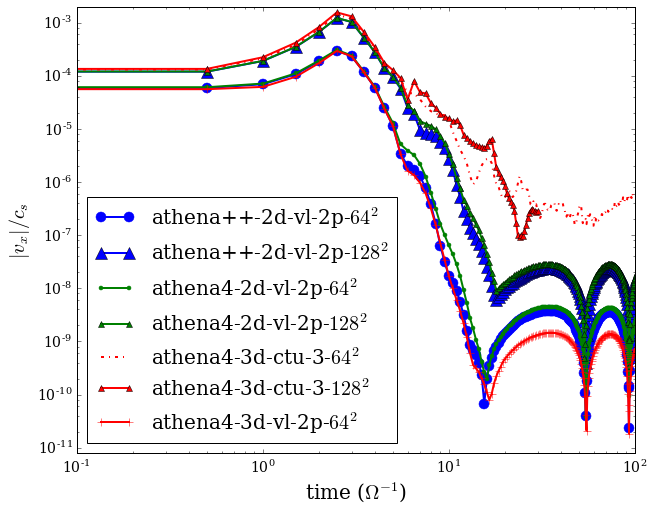

In [16]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(t0*2*np.pi,v0,'b.-',markersize=20) # athena++
plt.plot(t0_128*2*np.pi,v0_128,'b^-',markersize=12) # athena++
plt.plot(t1/1000.,v1*1e3,'g.-',markersize=8)   # athena4 2d vl2p
plt.plot(t1_128/1000.,v1_128*1e3,'g-^',markersize=6)   # athena4 2d vl2p r128
plt.plot(t2,v2,'r-.',markersize=8)    # athena4 3d ctu roe
plt.plot(t2_128,v2_128,'r-^',markersize=6)    # athena4 3d ctu roe r128
plt.plot(t3,v3,'r-+',markersize=8)    # athena4 3d ctu roe
plt.xscale('log') 
plt.yscale('log')
plt.xlim([0.1,100])
plt.ylim([8e-12,2e-3])
plt.xlabel('time ($\Omega^{-1}$)',fontsize=20)
plt.ylabel('$|v_x|/c_s$',fontsize=20)
plt.legend(['athena++-2d-vl-2p-$64^2$','athena++-2d-vl-2p-$128^2$',\
            'athena4-2d-vl-2p-$64^2$','athena4-2d-vl-2p-$128^2$', \
            'athena4-3d-ctu-3-$64^2$','athena4-3d-ctu-3-$128^2$',\
            'athena4-3d-vl-2p-$64^2$'],fontsize=20,loc='best')
plt.show()

similar results observed for both athena++ and old athena code. 

## 2. images 

ValueError: num must be 1 <= num <= 25, not 26

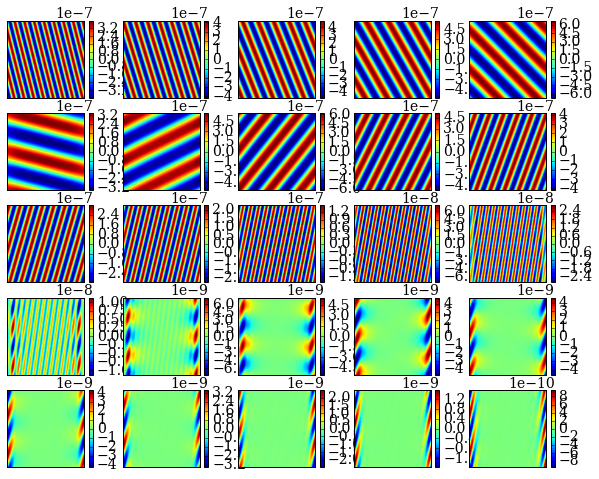

In [24]:
import athena_read  as ath
from shwave import cn4, cn5
# load snapshots and save to png
ts=0; te=30; targ='../develop/bin/shwave.r128/'
q = 1.5; omg = 1e-3
nplot = te - ts + 1
ngrid = int(np.sqrt(nplot))
cnt = 1

for i in np.arange(ts,te,1):
  filename=targ+'sst.block0.out2.'+cn5(i)+'.vtk'
  trunk = ath.vtk(filename)
  t = trunk[0]
  x = trunk[1]
  y = trunk[2]
  vel = trunk[4]['vel']
  if (cnt == 1):
    nx = np.size(x)
    ny = np.size(y)
    ngh = 2
    ii = 0+ngh
    ie = nx-ngh-1
    ji = ii
    je = ie
  xb = x[0:nx-1]+(x[1]-x[0])*0.5
  velx = vel[0,ii:ie,ji:je,0]
  vely = vel[0,ii:ie,ji:je,1]
  dvely = vel[0,ii:ie,ji:je,1] + np.resize(q*omg*xb[ii:ie],(ie-ii,je-ji))
  #rho = data['rho']
  plt.subplot(ngrid,ngrid,cnt)
  plt.imshow(dvely)
  plt.xticks([])
  plt.yticks([])
  plt.colorbar() 
  cnt += 1

plt.tight_layout()
plt.show()

# II. test epicyclic motion 
## 1. using athena4
good epicyclic energy conservation over hundred orbits even for wide box

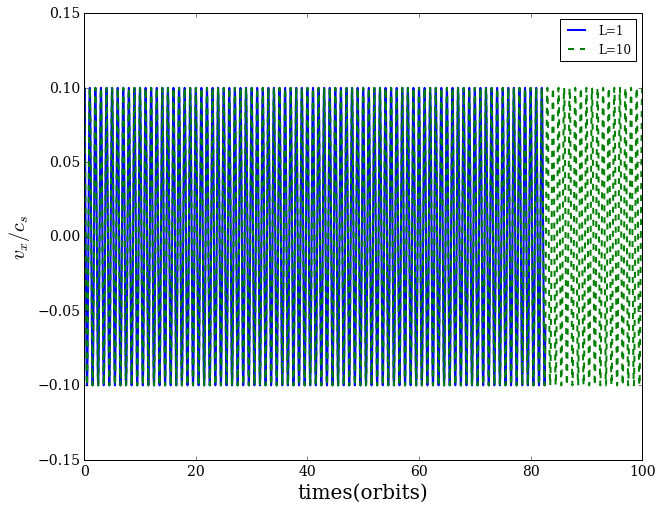

In [50]:
time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2 = np.loadtxt('../athena4.0/epicyclic/sst.hst.L1',unpack=True)
plt.plot(time/2/np.pi/1000.,m1/mass*1000.,linewidth=2)

time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2 = np.loadtxt('../athena4.0/epicyclic/sst.hst',unpack=True)
plt.plot(time/2/np.pi/1000.,m1/mass*1000.,'g--')

plt.xlabel('times(orbits)',fontsize=20)
plt.ylabel('$v_x/c_s$',fontsize=20)
plt.ylim([-0.15,0.15])
plt.xlim([0,100])
plt.legend(['L=1','L=10'])
plt.show()

## 2. Athena++ operator split
good conservation for small box, not so good for bigger one

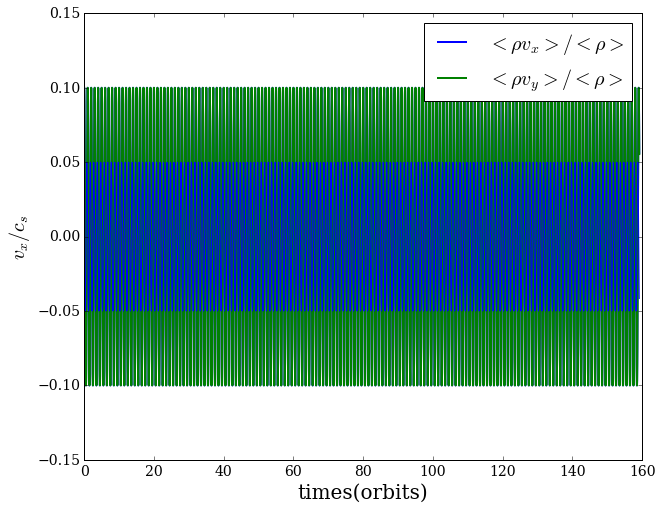

In [26]:
#time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2,tmp3 = np.loadtxt('../develop/bin/epicyclic.L1/sst.hst',unpack=True)
#plt.plot(time/2/np.pi/1000.,m1/mass*1000.,linewidth=2)

time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2,tmp3 = np.loadtxt('../develop/bin/epicyclic.L10/sst.hst',unpack=True)
plt.plot(time/2/np.pi/1000.,m1/mass*1000.,'g-')
plt.plot(time/2/np.pi/1000.,m2/mass*1000.,'b-',linewidth=1)

plt.xlabel('times(orbits)',fontsize=20)
plt.ylabel('$v_x/c_s$',fontsize=20)
plt.ylim([-0.15,0.15])
#plt.xlim([0,100])
#plt.legend(['L=1','L=10'])
plt.legend([r'$< \rho v_x>/< \rho >$',r'$< \rho v_y>/< \rho>$'], fontsize=20)
plt.show()

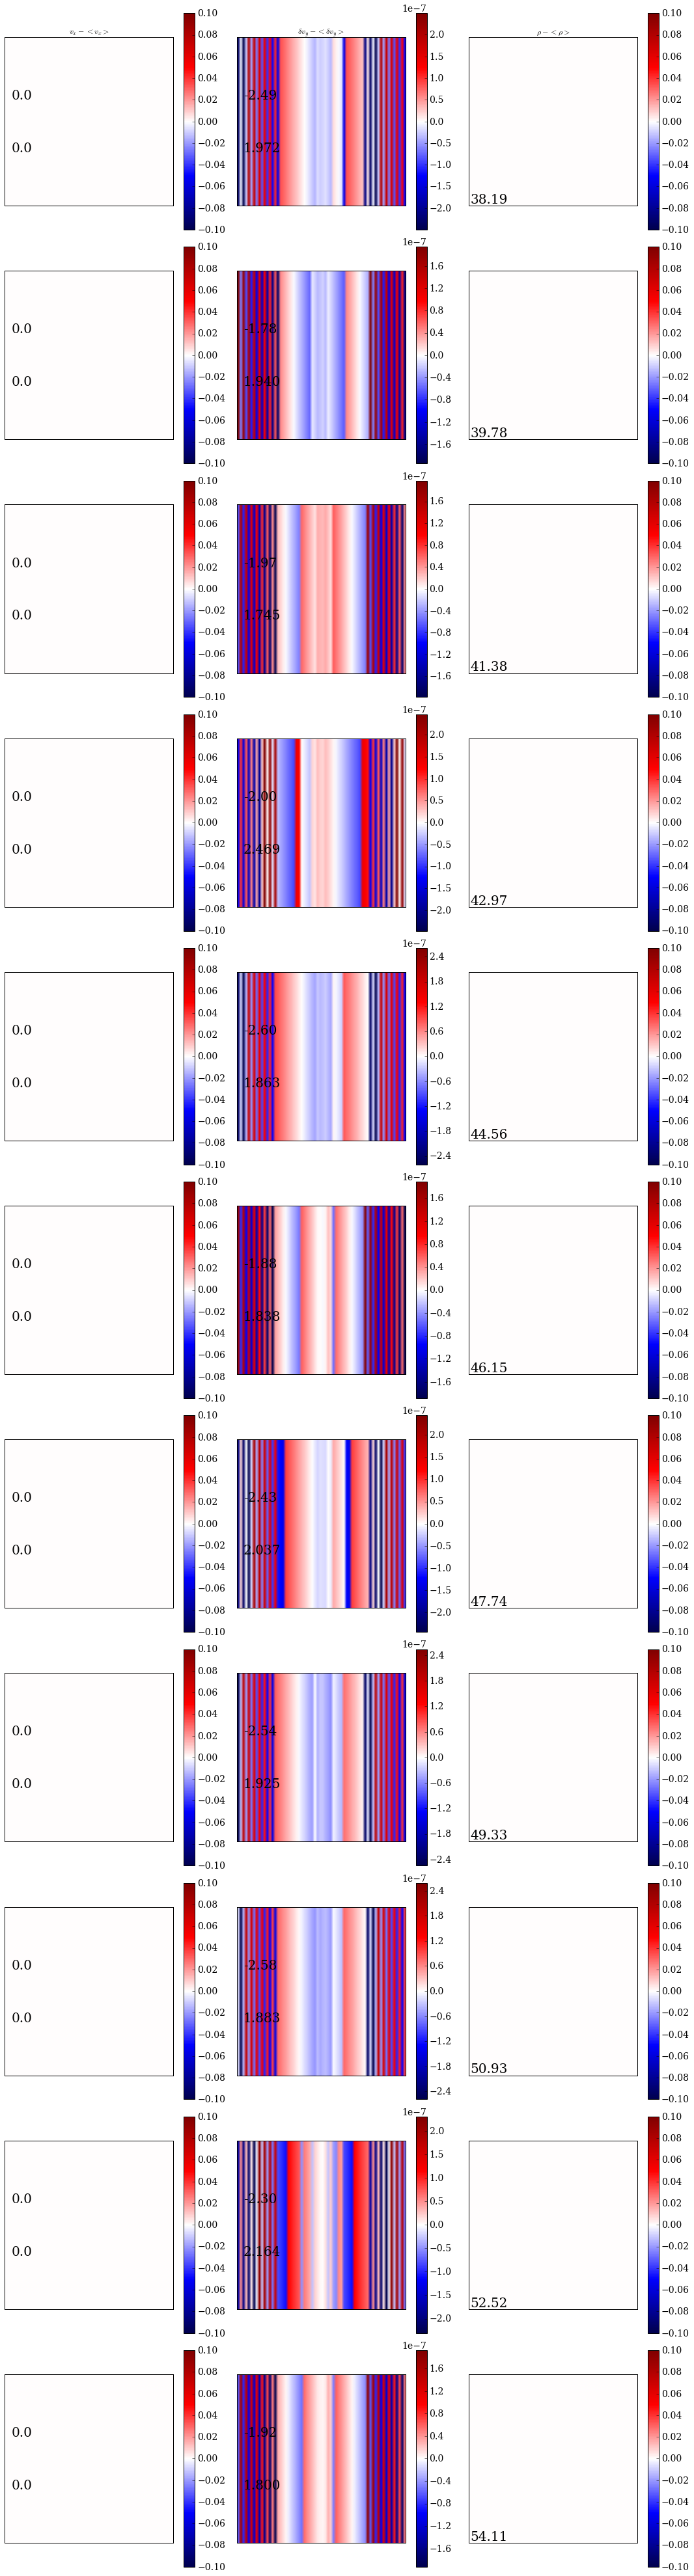

In [13]:

targ='../develop/bin/epicyclic.L10/'
ts=24; te=35; stride=2
q = 1.5; omg = 1e-3; cs = 1e-3
nplot = te - ts + 1
#ngrid = int(np.sqrt(nplot))
ngrid_y = 3
ngrid_x = nplot
cnt = 1
pylab.rcParams['figure.figsize'] = (15, 15.0*ngrid_x/ngrid_y)

for i in np.arange(ts,te,1):
  filename=targ+'sst.block0.out2.'+cn5(i)+'.vtk'
  trunk = ath.vtk(filename)
  t = trunk[0]
  x = trunk[1]
  y = trunk[2]
  vel = trunk[4]['vel']/cs
  rho = trunk[4]['rho']
  xb = x[0:68]+(x[1]-x[0])*0.5
  velx = vel[0,2:66,2:66,0]
  vely = vel[0,2:66,2:66,1]
  rhod = rho[0,2:66,2:66]
  dvely = vel[0,2:66,2:66,1] + np.resize(q*omg/cs*xb[2:66],(64,64))
  
  # plot velx
  plt.subplot(ngrid_x,ngrid_y,cnt)
  bavg = np.average(velx)
  velx = velx - bavg
  bbmax=np.max([np.abs(np.min(velx)), np.max(velx)])
  #bbmax = 0.1
  plt.imshow(velx,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax],origin='lower')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar() 
  plt.text(2,40,str(np.min(velx))[0:5],fontsize=20)
  plt.text(2,20,str(np.max(velx))[0:5],fontsize=20)
  if (i==ts):
    plt.title(r'$v_x-<v_x>$')
  cnt += 1
  
  # plot dvely
  plt.subplot(ngrid_x,ngrid_y,cnt)
  bavg = np.average(dvely)
  dvely = dvely - bavg
  #bbmax = 0.1  
  bbmax=np.max([np.abs(np.min(dvely)), np.max(dvely)])
  plt.imshow(dvely,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax],origin='lower')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()
  plt.text(2,40,str(np.min(dvely))[0:5],fontsize=20)
  plt.text(2,20,str(np.max(dvely))[0:5],fontsize=20)
  if (i==ts):
    plt.title(r'$\delta v_y-<\delta v_y>$')
  cnt += 1
  
  # plot rho
  plt.subplot(ngrid_x,ngrid_y,cnt)
  drho = rhod - np.average(rhod)
  bbmax=np.max([np.abs(np.min(drho)), np.max(drho)])
  #bbmax = 0.1
  plt.imshow(drho,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax],origin='lower')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()
  plt.text(0,0.5,str(t/1000./(2*np.pi))[0:5],fontsize=20)
  if (i==ts):
    plt.title(r'$\rho-<\rho>$')
  cnt += 1
  

plt.tight_layout()
plt.show()

# III.  test the axisymmetric modes of MRI in (x-z) shearing sheet

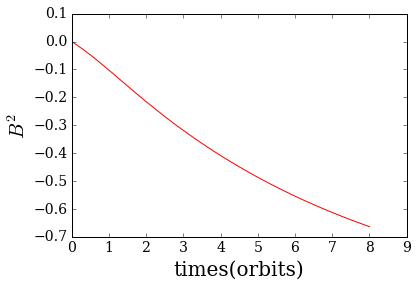

In [7]:
#time,dt,mass,m1,m2,m3,k1,k2,k3,tmp1,tmp2,tmp3 = np.loadtxt('../develop/bin/epicyclic.L1/sst.hst',unpack=True)
#plt.plot(time/2/np.pi/1000.,m1/mass*1000.,linewidth=2)

time,dt,mass,m1,m2,m3,k1,k2,k3,em1,em2,em3 = np.loadtxt('../develop/bin/mri/r64/HB3.hst',unpack=True)
#plt.plot(time/2/np.pi/1000.,em1,'g-')
#plt.plot(time/2/np.pi/1000.,em2,'b-',linewidth=1)
#plt.plot(time/2/np.pi/1000.,em3,'r-',linewidth=1)

plt.plot(time/2/np.pi/1000.,(em1+em3)/em3[0]-1.0,'r-',linewidth=1)

plt.xlabel('times(orbits)',fontsize=20)
plt.ylabel('$B^2$',fontsize=20)
#plt.ylim([-0.15,0.15])
#plt.xlim([0,100])
#plt.legend(['L=1','L=10'])
#plt.legend([r'$< \rho v_x>/< \rho >$',r'$< \rho v_y>/< \rho>$'], fontsize=20)
plt.show()

In [ ]:
import athena_read  as ath
from shwave import cn4, cn5
# load snapshots and save to png
ts=0; te=30; targ='../develop/bin/mri/r64/'
q = 1.5; omg = 1e-3
nplot = te - ts + 1
ngrid = int(np.sqrt(nplot))
cnt = 1

for i in np.arange(ts,te,1):
  filename=targ+'sst.block0.out2.'+cn5(i)+'.vtk'
  trunk = ath.vtk(filename)
  t = trunk[0]
  x = trunk[1]
  y = trunk[2]
  vel = trunk[4]['vel']
  if (cnt == 1):
    nx = np.size(x)
    ny = np.size(y)
    ngh = 2
    ii = 0+ngh
    ie = nx-ngh-1
    ji = ii
    je = ie
  xb = x[0:nx-1]+(x[1]-x[0])*0.5
  velx = vel[0,ii:ie,ji:je,0]
  vely = vel[0,ii:ie,ji:je,1]
  dvely = vel[0,ii:ie,ji:je,1] + np.resize(q*omg*xb[ii:ie],(ie-ii,je-ji))
  #rho = data['rho']
  plt.subplot(ngrid,ngrid,cnt)
  plt.imshow(dvely)
  plt.xticks([])
  plt.yticks([])
  plt.colorbar() 
  cnt += 1

plt.tight_layout()
plt.show()